In [98]:
import pandas as pd
taxi_data = pd.read_csv("Data/Pre_Processed/processed_data.csv")

In [99]:
taxi_data

,vendor_id,trip_duration,distance,pickup_day,pickup_month,pickup_day_section,pickup_rush_hour
0,2,6.120297,0.404478,1,3,5,2
1,1,6.496775,0.590842,7,6,8,3
2,2,7.661056,1.853967,2,1,2,3
3,2,6.061457,0.395750,3,4,6,2
4,2,6.075346,0.172766,6,3,3,2
...,...,...,...,...,...,...,...
1240753,1,6.633318,1.263436,7,4,6,2
1240754,2,6.025866,0.840467,2,2,8,3
1240755,1,6.484635,1.800031,7,1,1,3
1240756,2,6.638568,2.057273,5,4,1,3


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X_train, X_test, y_train, y_test = train_test_split(taxi_data.drop(['trip_duration'], axis=1), taxi_data['trip_duration'], test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 0.09285495394588693
R-squared score: 0.7748257142666802


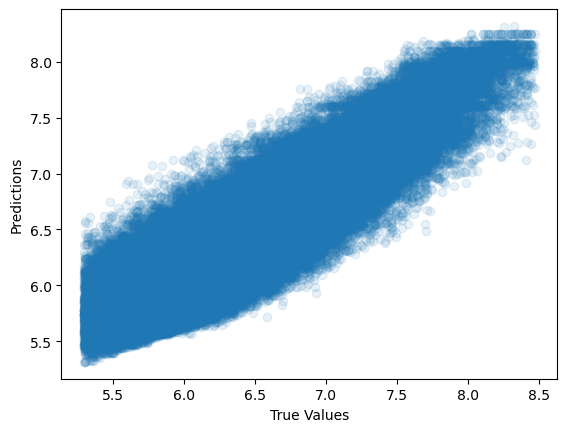

In [107]:
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Hyperparameter tweaking
Alternating depth values

k fold with best hyperparameters k =10 randomforest n_estimators = 100, depth =10 

Fold 1
MSE: 0.09
RMSE: 0.31
RMSLE: 0.04
R-squared: 0.77
Fold 2
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77
Fold 3
MSE: 0.09
RMSE: 0.31
RMSLE: 0.04
R-squared: 0.78
Fold 4
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77
Fold 5
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.78
Fold 6
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77
Fold 7
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77
Fold 8
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77
Fold 9
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77
Fold 10
MSE: 0.09
RMSE: 0.30
RMSLE: 0.04
R-squared: 0.77


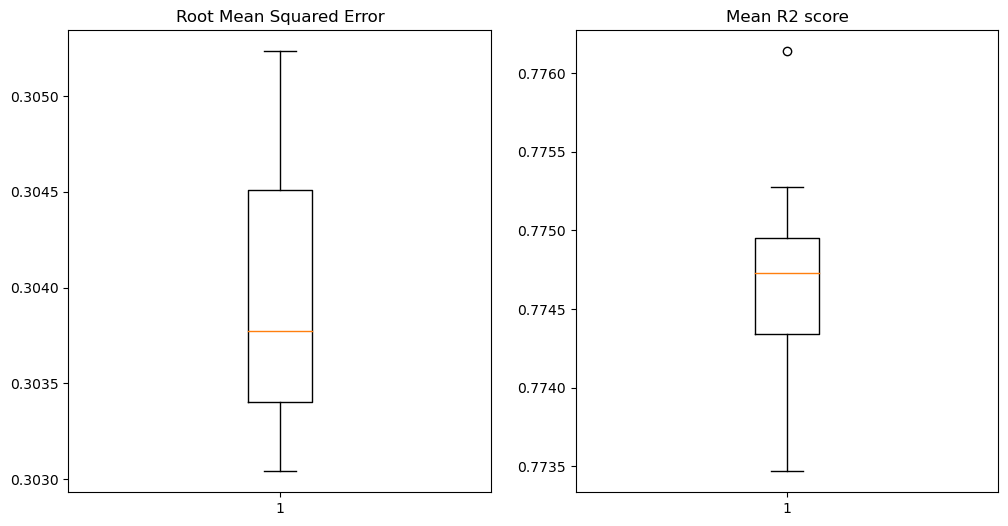

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import numpy as np
import matplotlib.pyplot as plt

num_folds = 10
X = taxi_data.drop(['trip_duration'], axis=1)
y = taxi_data['trip_duration']

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
mse_scores = []
rmse_scores = []
rmsle_scores = []
r2_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    print(f'Fold {fold + 1}')
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    rf = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'RMSLE: {rmsle:.2f}')
    print(f'R-squared: {r2:.2f}')
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    rmsle_scores.append(rmsle)
    r2_scores.append(r2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].boxplot(rmse_scores)
axes[0].set_title('Root Mean Squared Error')
axes[1].boxplot(r2_scores)
axes[1].set_title('Mean R2 score')
plt.show()


In [106]:
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
print('Mean R2 score:', mean_r2)
print('Mean MSE:', mean_mse)


Mean R2 score: 0.7746809624274605
Mean MSE: 0.09240789871753803
